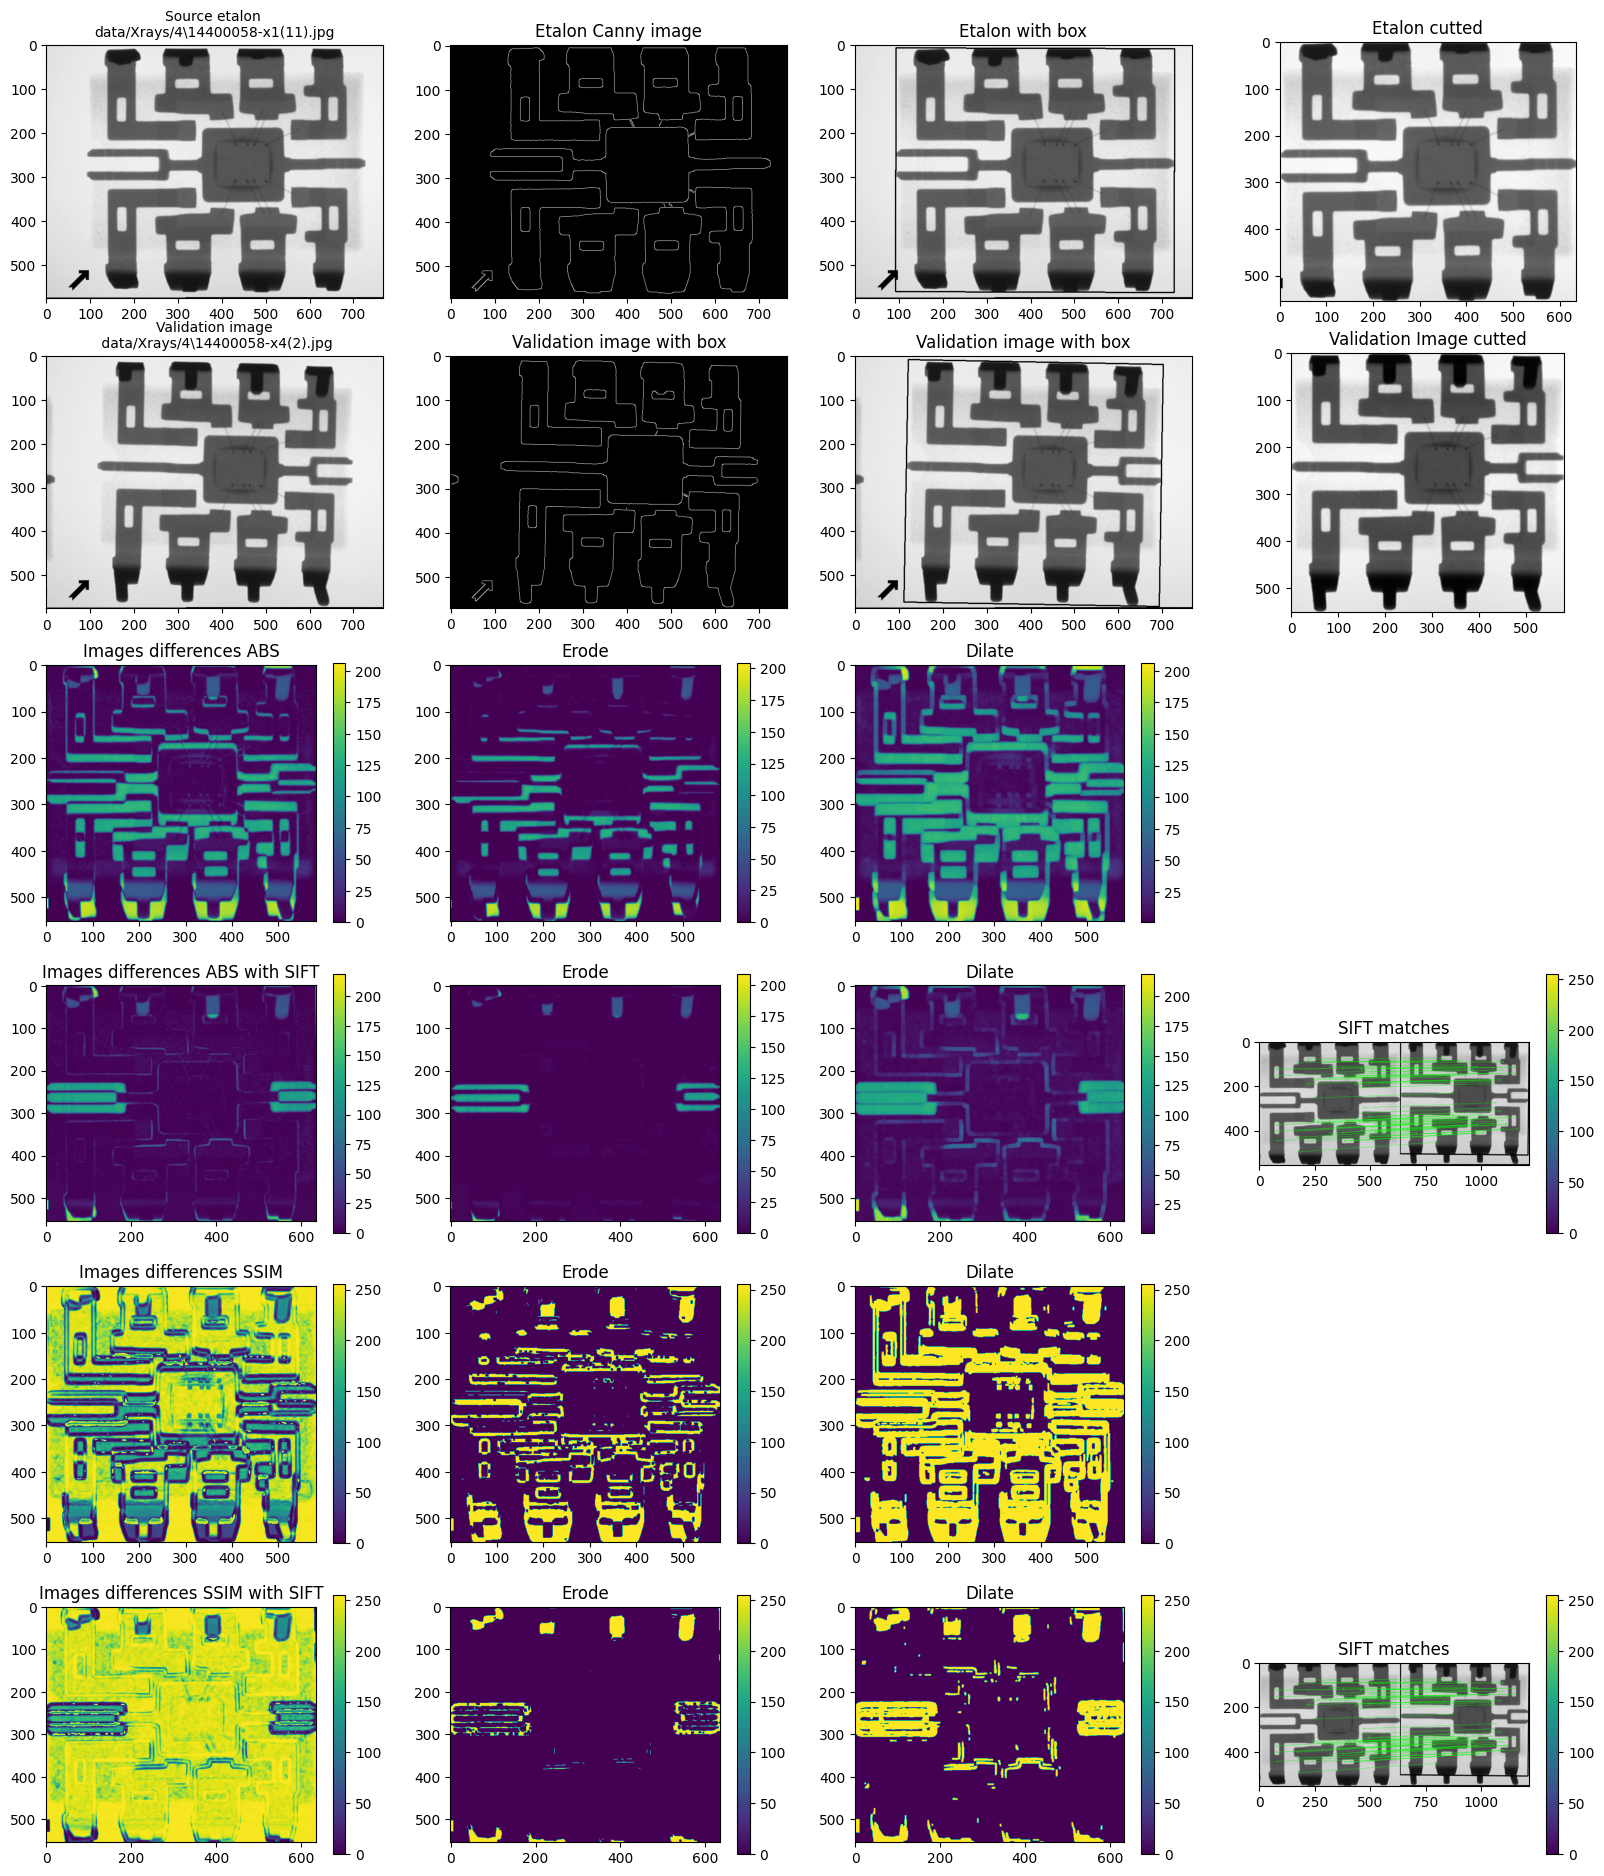

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn.cluster import DBSCAN
from collections import Counter
from scipy.spatial import distance as dist
import glob
from skimage.metrics import structural_similarity as compare_ssim
from process import *
import imutils


def validate(
        etalon_path: str, 
        img_path: str, 
        savefig_path: str = None
        ) -> None:

    etalon_img = cv2.imdecode(np.fromfile(etalon_path, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    test_img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    etalon_cut_data = get_window(etalon_img)
    test_cut_data = get_window(test_img)
    try:
        superimpose_data = update_image_by_etalon(
            etalon_cut_data['img_cutted'], 
            test_cut_data['img_cutted']
            )
    except Exception as e:
        print('SIFT not working')
        print(e)
        return
    differences1_data = find_differences1(
        cv2.resize(etalon_cut_data['img_cutted'], test_cut_data['img_cutted'].shape[::-1]), 
        test_cut_data['img_cutted']
        )
    differences2_data = find_differences2(
        cv2.resize(etalon_cut_data['img_cutted'], test_cut_data['img_cutted'].shape[::-1]), 
        test_cut_data['img_cutted']
        )
    differences1_superimpose_data = find_differences1(etalon_cut_data['img_cutted'], superimpose_data['img_cutted'])
    differences2_superimpose_data = find_differences2(etalon_cut_data['img_cutted'], superimpose_data['img_cutted'])

    rows = 20
    columns = 4
    fig = plt.figure(figsize=(5*columns, rows*4))
    fig.add_subplot(rows, columns, 1)
    plt.imshow(etalon_img, 'gray')
    plt.title(f'Source etalon \n{etalon_path}', fontsize=10)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(etalon_cut_data['img_canny'], 'gray')
    plt.title('Etalon Canny image')
    fig.add_subplot(rows, columns, 3)
    plt.imshow(etalon_cut_data['img_box'], 'gray')
    plt.title('Etalon with box')
    fig.add_subplot(rows, columns, 4)
    plt.imshow(etalon_cut_data['img_cutted'], 'gray')
    plt.title('Etalon cutted')

    fig.add_subplot(rows, columns, 5)
    plt.imshow(test_img, 'gray')
    plt.title(f'Validation image\n {img_path}', fontsize=10)
    fig.add_subplot(rows, columns, 6)
    plt.imshow(test_cut_data['img_canny'], 'gray')
    plt.title('Validation image with box')
    fig.add_subplot(rows, columns, 7)
    plt.imshow(test_cut_data['img_box'], 'gray')
    plt.title('Validation image with box')
    fig.add_subplot(rows, columns, 8)
    plt.imshow(test_cut_data['img_cutted'], 'gray')
    plt.title('Validation Image cutted')

    fig.add_subplot(rows, columns, 9)
    plt.imshow(differences1_data['img_diff'])
    plt.title('Images differences ABS')
    plt.colorbar()
    fig.add_subplot(rows, columns, 10)
    plt.imshow(differences1_data['img_diff_erode'])
    plt.title('Erode')
    plt.colorbar()
    fig.add_subplot(rows, columns, 11)
    plt.imshow(differences1_data['img_diff_dilate'])
    plt.title('Dilate')
    plt.colorbar()

    fig.add_subplot(rows, columns, 13)
    plt.imshow(differences1_superimpose_data['img_diff'])
    plt.title('Images differences ABS with SIFT')
    plt.colorbar()
    fig.add_subplot(rows, columns, 14)
    plt.imshow(differences1_superimpose_data['img_diff_erode'])
    plt.title('Erode')
    plt.colorbar()
    fig.add_subplot(rows, columns, 15)
    plt.imshow(differences1_superimpose_data['img_diff_dilate'])
    plt.title('Dilate')
    plt.colorbar()
    fig.add_subplot(rows, columns, 16)
    plt.imshow(superimpose_data['img_matches'])
    plt.title('SIFT matches')
    plt.colorbar()

    fig.add_subplot(rows, columns, 17)
    plt.imshow(differences2_data['img_diff'])
    plt.title('Images differences SSIM')
    plt.colorbar()
    fig.add_subplot(rows, columns, 18)
    plt.imshow(differences2_data['img_diff_erode'])
    plt.title('Erode')
    plt.colorbar()
    fig.add_subplot(rows, columns, 19)
    plt.imshow(differences2_data['img_diff_dilate'])
    plt.title('Dilate')
    plt.colorbar()

    fig.add_subplot(rows, columns, 21)
    plt.imshow(differences2_superimpose_data['img_diff'])
    plt.title('Images differences SSIM with SIFT')
    plt.colorbar()
    fig.add_subplot(rows, columns, 22)
    plt.imshow(differences2_superimpose_data['img_diff_erode'])
    plt.title('Erode')
    plt.colorbar()
    fig.add_subplot(rows, columns, 23)
    plt.imshow(differences2_superimpose_data['img_diff_dilate'])
    plt.title('Dilate')
    plt.colorbar()
    fig.add_subplot(rows, columns, 24)
    plt.imshow(superimpose_data['img_matches'])
    plt.title('SIFT matches')
    plt.colorbar()

    if savefig_path is not None:
        if dir_path := os.path.dirname(savefig_path):
            os.makedirs(dir_path, exist_ok=True)
        plt.savefig(savefig_path, bbox_inches='tight')




chip_type = '4'
images = glob.glob(f'data/Xrays/{chip_type}/*.jpg') + glob.glob(f'data/Xrays/{chip_type}/*.jpeg')

etalon_path = images[0]
img_path = images[1]
validate(etalon_path, img_path, f'Validation/{chip_type}/{1}.png')


In [11]:
chip_type = '8'
glob.glob(f'data/Xrays/{chip_type}/*.jpg') + glob.glob(f'data/Xrays/{chip_type}/*.jpeg')

['data/Xrays/8\\1.jpeg',
 'data/Xrays/8\\2.jpeg',
 'data/Xrays/8\\3.jpeg',
 'data/Xrays/8\\4.jpeg',
 'data/Xrays/8\\5.jpeg']

In [5]:
np.random.choice(10, np.random.random((100,2)), )

ValueError: maximum supported dimension for an ndarray is 32, found 100

In [6]:
np.random.random((100,2))

array([[0.55267473, 0.34923426],
       [0.26961401, 0.41459283],
       [0.89883713, 0.19269527],
       [0.6170535 , 0.04568587],
       [0.56012114, 0.05977181],
       [0.18138935, 0.84624736],
       [0.34408808, 0.11177341],
       [0.4680201 , 0.98582325],
       [0.73987625, 0.98952189],
       [0.78080347, 0.51202077],
       [0.37777132, 0.54555717],
       [0.55162543, 0.92969316],
       [0.57169319, 0.24255338],
       [0.26260274, 0.98301684],
       [0.11902825, 0.34692233],
       [0.06159177, 0.10804206],
       [0.15294145, 0.55873516],
       [0.87602949, 0.26981515],
       [0.05692908, 0.41687181],
       [0.98739373, 0.98686839],
       [0.16525002, 0.18044848],
       [0.56832245, 0.68534642],
       [0.64557721, 0.91633863],
       [0.40076424, 0.5509164 ],
       [0.65901737, 0.4988916 ],
       [0.60928753, 0.77473488],
       [0.71289651, 0.16396174],
       [0.03929841, 0.10684385],
       [0.18551886, 0.58140918],
       [0.789045  , 0.55084672],
       [0.